In [1]:
from utils import clear_start
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
from autoencoder import AutoEncoder
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import construct_label, clear_start
%matplotlib inline

In [2]:
def visualize_encodings2D(ae, train_x, train_y=None, test_x=None, test_y=None, alpha=0.3):
    train_x = np.array(train_x)
    train_encodings = ae.fit_transform(train_x)
    if train_y is not None:
        plt.scatter(*train_encodings.T, c=train_y, alpha=alpha)
    if test_x is not None:
        test_x = np.array(test_x)
        test_encodings = ae.fit_transform(test_x)
        if test_y is not None:
            plt.scatter(*test_encodings.T, c=test_y)
        else:
            plt.scatter(*test_encodings.T)
    else:
        if train_y is not None:
            plt.scatter(*train_encodings.T, c=train_y)
        else:
            plt.scatter(*train_encodings.T)
    plt.show()

In [3]:
random_state=17

In [4]:
X, y = data.load_digits(return_X_y=True)

In [5]:
X.shape, y.shape

((1797, 64), (1797,))

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

In [7]:
ae = AutoEncoder(structure=[64, 8, 2, 8, 64], encoding_layer_index=2,
                 verbose=True, random_state=random_state, cpu_only=False)

In [8]:
ae.fit(train_x, seperate_validation=False, use_batch_norm=True, batch_norm_train=True, 
       early_stopping_epochs=3, dropout_keep_rate=0.5, 
       n_epochs=100, batch_size=32, learning_rate=0.01, beta=0.01)
# hyperparameters can really affect the result
# don't be disappointed if it doesn't work from the first try

seed is fixed to 17
epoch 0 started
0 epoch mean loss: 59.915524
epoch 1 started
1 epoch mean loss: 41.644684
epoch 2 started
2 epoch mean loss: 25.946662
epoch 3 started
3 epoch mean loss: 20.509649
epoch 4 started
4 epoch mean loss: 18.969627
epoch 5 started
5 epoch mean loss: 18.290551
epoch 6 started
6 epoch mean loss: 17.584677
epoch 7 started
7 epoch mean loss: 16.879957
epoch 8 started
8 epoch mean loss: 16.148534
epoch 9 started
9 epoch mean loss: 15.647129
epoch 10 started
10 epoch mean loss: 15.411675
epoch 11 started
11 epoch mean loss: 15.177123
epoch 12 started
12 epoch mean loss: 15.086891
epoch 13 started
13 epoch mean loss: 14.966624
epoch 14 started
14 epoch mean loss: 14.869932
epoch 15 started
15 epoch mean loss: 14.817450
epoch 16 started
16 epoch mean loss: 14.766406
epoch 17 started
17 epoch mean loss: 14.679805
epoch 18 started
18 epoch mean loss: 14.671119
epoch 19 started
19 epoch mean loss: 14.590325
epoch 20 started
20 epoch mean loss: 14.576456
epoch 21 star

In [9]:
ae.score(train_x)

29.14756277290731

In [10]:
ae.score(test_x)

29.374843623862905

In [11]:
ae.best_loss

14.229677113619717

The inference took 0.015268087387084961 seconds


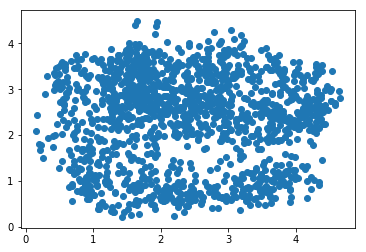

In [12]:
visualize_encodings2D(ae, train_x)

The inference took 0.0015172958374023438 seconds


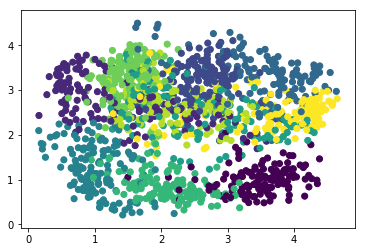

In [13]:
visualize_encodings2D(ae, train_x, train_y)

The inference took 0.0010254383087158203 seconds
The inference took 0.0005309581756591797 seconds


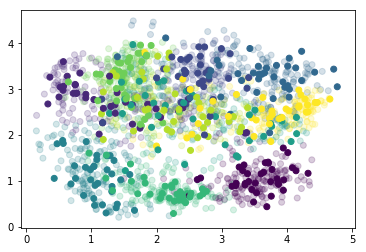

In [14]:
visualize_encodings2D(ae, train_x, train_y, test_x, test_y, alpha=0.2)

In [15]:
ae.save_pb('./ae.pb')

INFO:tensorflow:Froze 17 variables.
INFO:tensorflow:Converted 17 variables to const ops.


In [16]:
ae2 = AutoEncoder()
ae2 = ae2.load_pb('./ae.pb') # for use only

In [17]:
encodings = ae2.fit_transform(train_x)

In [18]:
encodings.shape

(1437, 2)

In [19]:
encoded_decoded = ae2.predict(train_x)

In [20]:
encoded_decoded.shape

(1437, 64)

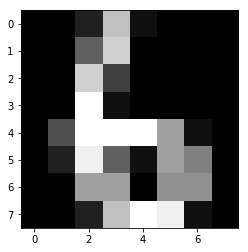

In [21]:
plt.imshow(test_x[0].reshape((8,8)), cmap='gray')

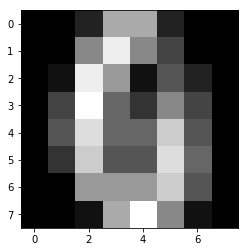

In [22]:
plt.imshow(ae2.predict([test_x[0]]).astype(np.uint).reshape((8,8)), cmap='gray')
# as you can see the decoded is not too similar to the input, but it learned the encodings well,
# which is its main task. If the outputs also matter you can try more sophesticated types of autoencoders